In [96]:
import pandas as pd
import numpy as np
import seaborn as sns
import operator
from matplotlib import pyplot as plt

In [97]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
random_state = 42

In [98]:
df = pd.read_csv('../../data/processed/processed_data.csv',
                 dtype={'SK_ID_CURR': 'object'})
df.head()

SK_ID_CURR  BUREAU_LOAN_COUNT  AVG_CREDIT_MAX_OVERDUE  BUREAU_LOAN_TYPES  \
0     100002                  8             1050.643125                  2   
1     100003                  4                0.000000                  2   
2     100004                  2                0.000000                  1   
3     100007                  1                0.000000                  1   
4     100008                  3                0.000000                  1   

   ACTIVE_LOANS_PERCENTAGE  CREDIT_ENDDATE_PERCENTAGE  TOTAL_CUSTOMER_DEBT  \
0                 0.250000                   0.625000             245781.0   
1                 0.250000                   0.250000                  0.0   
2                 0.000000                   0.000000                  0.0   
3                 0.000000                   0.000000                  0.0   
4                 0.333333                   0.333333             240057.0   

   TOTAL_CUSTOMER_CREDIT  TOTAL_CUSTOMER_OVERDUE  AVG_DAYS_CREDIT_UPDATE  \
0             865055.565                     0.0                -499.875   
1            1017400.500                     0.0                -816.000   
2             189037.800                     0.0                -532.000   
3             146250.000                     0.0                -783.000   
4             468445.500                     0.0                -611.000   

   AVG_CREDITDAYS_PROLONGED  AMT_ANNUITY_PERCENTAGE  AVERAGE_LOAN_TYPE  \
0                       0.0                   0.875                4.0   
1                       0.0                   0.000                2.0   
2                       0.0                   0.000                2.0   
3                       0.0                   0.000                1.0   
4                       0.0                   0.000                3.0   

   DEBT_CREDIT_RATIO  OVERDUE_DEBT_RATIO  TARGET  AMT_REQ_CREDIT_BUREAU_MON  \
0           0.284122                 0.0       1                        0.0   
1           0.000000                 0.0       0                        0.0   
2           0.000000                 0.0       0                        0.0   
3           0.000000                 0.0       0                        0.0   
4           0.512454                 0.0       0                        0.0   

   DAYS_EMPLOYED  DEF_30_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  \
0           -637                       2.0                       2.0   
1          -1188                       0.0                       0.0   
2           -225                       0.0                       0.0   
3          -3038                       0.0                       0.0   
4          -1588                       0.0                       0.0   

   EXT_SOURCE_2  EXT_SOURCE_3  FLAG_OWN_REALTY  NAME_CONTRACT_TYPE  \
0      0.262949      0.139376                1                   1   
1      0.622246      0.565961                0                   1   
2      0.555912      0.729567                1                   0   
3      0.322738      0.565961                1                   1   
4      0.354225      0.621226                1                   1   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  REG_REGION_NOT_WORK_REGION  \
0                       0                       0                           0   
1                       0                       0                           0   
2                       0                       0                           0   
3                       0                       1                           0   
4                       0                       0                           0   

   CODE_GENDER_F  CODE_GENDER_M  NAME_EDUCATION_TYPE_Higher education  \
0              0              1                                     0   
1              1              0                                     1   
2              0              1                                     0   
3              0              1                       

In [99]:
df.shape

(263491, 50)

In [100]:
y = df['TARGET']
X = df.drop(['TARGET', 'SK_ID_CURR'], axis=1)

In [101]:
X.shape, y.shape, y.mean()

((263491, 48), (263491,), 0.07730055296006315)

In [102]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=random_state,
                                                    stratify=y)

In [104]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((184443, 48), (79048, 48), (184443,), (79048,))

In [105]:
y_train.mean(), y_test.mean()

(0.07730301502361163, 0.07729480821779172)

In [106]:
scaler = RobustScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [107]:
clf = LogisticRegressionCV(max_iter=500,
                           cv=StratifiedKFold(),
                           random_state=random_state)

In [108]:
clf.fit(X_train, y_train)

LogisticRegressionCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                     max_iter=500, random_state=42)

In [109]:
clf.coef_, clf.intercept_

(array([[-8.16006690e-05, -1.40996153e-03,  7.69442403e-05,
         -2.22927025e-05, -1.16652381e-05, -2.36884261e-04,
         -1.71605554e-04, -1.87677779e-07,  4.06567174e-05,
         -2.29585037e-06, -1.55730030e-04, -7.84775589e-05,
          6.05904572e-10, -2.82567262e-10, -8.65220362e-05,
         -3.91707839e-03, -4.05510020e-05, -2.79020437e-05,
          3.20464003e-05,  2.19252488e-05,  9.79153824e-05,
          3.25017691e-05, -2.24105712e-05, -7.35323743e-05,
         -1.68654150e-05,  1.03474440e-04, -1.03464616e-04,
         -8.58939626e-05, -1.07928275e-05, -2.70409603e-06,
          9.95725593e-05, -9.27747253e-05, -6.65864625e-06,
         -1.25181714e-05, -1.63904650e-05, -8.42544524e-06,
         -1.39842278e-05, -4.87930887e-05, -1.11644679e-05,
         -3.46845251e-06, -3.94192276e-05, -1.55414135e-05,
         -9.84704074e-06, -2.81977709e-05, -7.64925971e-05,
         -3.50704729e-05, -3.83924863e-06,  1.15402319e-04]]),
 array([-0.00031072]))

In [110]:
from sklearn.metrics import roc_auc_score, f1_score, \
                            plot_confusion_matrix, plot_roc_curve

/home/ilyam/.pyenv/versions/3.10.2/envs/mlops_neptune/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


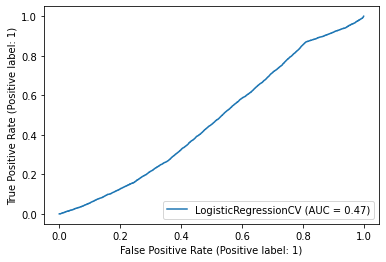

In [111]:
plot_roc_curve(clf, X_test, y_test)

In [112]:
roc_auc_score(clf.predict(X_test), y_test)

0.48466198853003734

In [113]:
f1_score(clf.predict(X_test), y_test)

0.08625605930995153

/home/ilyam/.pyenv/versions/3.10.2/envs/mlops_neptune/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


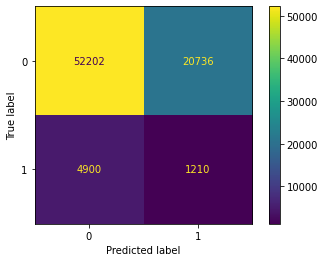

In [114]:
plot_confusion_matrix(clf, X_test, y_test);

In [116]:
# Сохранение модели pickle
import pickle
filepath = '../../models/1_logistic_regression_train_bureau.sav'
pickle.dump(clf, open(filepath, 'wb'))

/home/ilyam/.pyenv/versions/3.10.2/envs/mlops_neptune/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


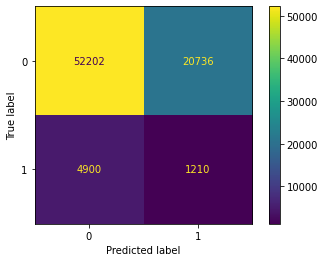

In [117]:
# Использование сохранённой модели
loaded_model = pickle.load(open(filepath, 'rb'))
plot_confusion_matrix(loaded_model, X_test, y_test);

Градиентный бустинг

In [87]:
from sklearn.ensemble import GradientBoostingClassifier

In [88]:
df = pd.read_csv('../../data/processed/processed_data.csv',
                 dtype={'SK_ID_CURR': 'object'})
df.head()

SK_ID_CURR  BUREAU_LOAN_COUNT  AVG_CREDIT_MAX_OVERDUE  BUREAU_LOAN_TYPES  \
0     100002                  8             1050.643125                  2   
1     100003                  4                0.000000                  2   
2     100004                  2                0.000000                  1   
3     100007                  1                0.000000                  1   
4     100008                  3                0.000000                  1   

   ACTIVE_LOANS_PERCENTAGE  CREDIT_ENDDATE_PERCENTAGE  TOTAL_CUSTOMER_DEBT  \
0                 0.250000                   0.625000             245781.0   
1                 0.250000                   0.250000                  0.0   
2                 0.000000                   0.000000                  0.0   
3                 0.000000                   0.000000                  0.0   
4                 0.333333                   0.333333             240057.0   

   TOTAL_CUSTOMER_CREDIT  TOTAL_CUSTOMER_OVERDUE  AVG_DAYS_CREDIT_UPDATE  \
0             865055.565                     0.0                -499.875   
1            1017400.500                     0.0                -816.000   
2             189037.800                     0.0                -532.000   
3             146250.000                     0.0                -783.000   
4             468445.500                     0.0                -611.000   

   AVG_CREDITDAYS_PROLONGED  AMT_ANNUITY_PERCENTAGE  AVERAGE_LOAN_TYPE  \
0                       0.0                   0.875                4.0   
1                       0.0                   0.000                2.0   
2                       0.0                   0.000                2.0   
3                       0.0                   0.000                1.0   
4                       0.0                   0.000                3.0   

   DEBT_CREDIT_RATIO  OVERDUE_DEBT_RATIO  TARGET  AMT_REQ_CREDIT_BUREAU_MON  \
0           0.284122                 0.0       1                        0.0   
1           0.000000                 0.0       0                        0.0   
2           0.000000                 0.0       0                        0.0   
3           0.000000                 0.0       0                        0.0   
4           0.512454                 0.0       0                        0.0   

   DAYS_EMPLOYED  DEF_30_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  \
0           -637                       2.0                       2.0   
1          -1188                       0.0                       0.0   
2           -225                       0.0                       0.0   
3          -3038                       0.0                       0.0   
4          -1588                       0.0                       0.0   

   EXT_SOURCE_2  EXT_SOURCE_3  FLAG_OWN_REALTY  NAME_CONTRACT_TYPE  \
0      0.262949      0.139376                1                   1   
1      0.622246      0.565961                0                   1   
2      0.555912      0.729567                1                   0   
3      0.322738      0.565961                1                   1   
4      0.354225      0.621226                1                   1   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  REG_REGION_NOT_WORK_REGION  \
0                       0                       0                           0   
1                       0                       0                           0   
2                       0                       0                           0   
3                       0                       1                           0   
4                       0                       0                           0   

   CODE_GENDER_F  CODE_GENDER_M  NAME_EDUCATION_TYPE_Higher education  \
0              0              1                                     0   
1              1              0                                     1   
2              0              1                                     0   
3              0              1                       

In [89]:
y = df['TARGET']
X = df.drop(['TARGET', 'SK_ID_CURR'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=random_state,
                                                    stratify=y)
gbc = GradientBoostingClassifier(random_state=random_state)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [93]:
roc_auc_score(gbc.predict(X_test), y_test)

0.6865673859713175

In [94]:
f1_score(gbc.predict(X_test), y_test)

0.028218135700697523

/home/ilyam/.pyenv/versions/3.10.2/envs/mlops_neptune/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


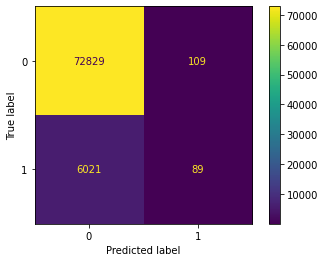

In [95]:
plot_confusion_matrix(gbc, X_test, y_test);

Модель только на application_train

In [59]:
df = pd.read_csv('../../data/processed/processed_data.csv',
                 dtype={'SK_ID_CURR': 'object'})
df.head()

SK_ID_CURR  BUREAU_LOAN_COUNT  AVG_CREDIT_MAX_OVERDUE  BUREAU_LOAN_TYPES  \
0     100002                  8             1050.643125                  2   
1     100003                  4                0.000000                  2   
2     100004                  2                0.000000                  1   
3     100007                  1                0.000000                  1   
4     100008                  3                0.000000                  1   

   ACTIVE_LOANS_PERCENTAGE  CREDIT_ENDDATE_PERCENTAGE  TOTAL_CUSTOMER_DEBT  \
0                 0.250000                   0.625000             245781.0   
1                 0.250000                   0.250000                  0.0   
2                 0.000000                   0.000000                  0.0   
3                 0.000000                   0.000000                  0.0   
4                 0.333333                   0.333333             240057.0   

   TOTAL_CUSTOMER_CREDIT  TOTAL_CUSTOMER_OVERDUE  AVG_DAYS_CREDIT_UPDATE  \
0             865055.565                     0.0                -499.875   
1            1017400.500                     0.0                -816.000   
2             189037.800                     0.0                -532.000   
3             146250.000                     0.0                -783.000   
4             468445.500                     0.0                -611.000   

   AVG_CREDITDAYS_PROLONGED  AMT_ANNUITY_PERCENTAGE  AVERAGE_LOAN_TYPE  \
0                       0.0                   0.875                4.0   
1                       0.0                   0.000                2.0   
2                       0.0                   0.000                2.0   
3                       0.0                   0.000                1.0   
4                       0.0                   0.000                3.0   

   DEBT_CREDIT_RATIO  OVERDUE_DEBT_RATIO  TARGET  AMT_REQ_CREDIT_BUREAU_MON  \
0           0.284122                 0.0       1                        0.0   
1           0.000000                 0.0       0                        0.0   
2           0.000000                 0.0       0                        0.0   
3           0.000000                 0.0       0                        0.0   
4           0.512454                 0.0       0                        0.0   

   DAYS_EMPLOYED  DEF_30_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  \
0           -637                       2.0                       2.0   
1          -1188                       0.0                       0.0   
2           -225                       0.0                       0.0   
3          -3038                       0.0                       0.0   
4          -1588                       0.0                       0.0   

   EXT_SOURCE_2  EXT_SOURCE_3  FLAG_OWN_REALTY  NAME_CONTRACT_TYPE  \
0      0.262949      0.139376                1                   1   
1      0.622246      0.565961                0                   1   
2      0.555912      0.729567                1                   0   
3      0.322738      0.565961                1                   1   
4      0.354225      0.621226                1                   1   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  REG_REGION_NOT_WORK_REGION  \
0                       0                       0                           0   
1                       0                       0                           0   
2                       0                       0                           0   
3                       0                       1                           0   
4                       0                       0                           0   

   CODE_GENDER_F  CODE_GENDER_M  NAME_EDUCATION_TYPE_Higher education  \
0              0              1                                     0   
1              1              0                                     1   
2              0              1                                     0   
3              0              1                       

In [60]:
y = df['TARGET']
X = df.drop(['TARGET', 'SK_ID_CURR'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=random_state,
                                                    stratify=y)
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
clf = LogisticRegressionCV(max_iter=500,
                           cv=StratifiedKFold(),
                           random_state=random_state)
clf.fit(X_train, y_train)

LogisticRegressionCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                     max_iter=500, random_state=42)

In [61]:
roc_auc_score(clf.predict(X_test), y_test)

0.6605312067829032

In [62]:
f1_score(clf.predict(X_test), y_test)

0.01256443298969072

/home/ilyam/.pyenv/versions/3.10.2/envs/mlops_neptune/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


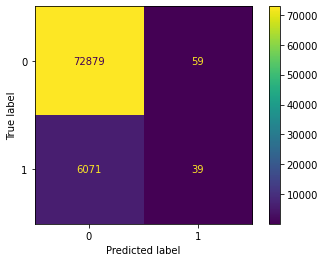

In [63]:
plot_confusion_matrix(clf, X_test, y_test);

In [53]:
most_val_features = [i[0] for i in sorted(zip(df.columns, clf.coef_[0]), 
                                          key=lambda x: np.abs(x[1]), 
                                          reverse=True)]

In [54]:
most_val_features[:10]

['TARGET',
 'BUREAU_LOAN_COUNT',
 'CREDIT_ENDDATE_PERCENTAGE',
 'TOTAL_CUSTOMER_DEBT',
 'AVG_CREDITDAYS_PROLONGED',
 'OWN_CAR_AGE_2',
 'REG_CITY_NOT_WORK_CITY',
 'REG_REGION_NOT_WORK_REGION',
 'NAME_EDUCATION_TYPE_Incomplete higher',
 'EXT_SOURCE_2']

In [25]:
df['TARGET'] = y
df['DAYS_EMPLOYED'].nunique()

12574

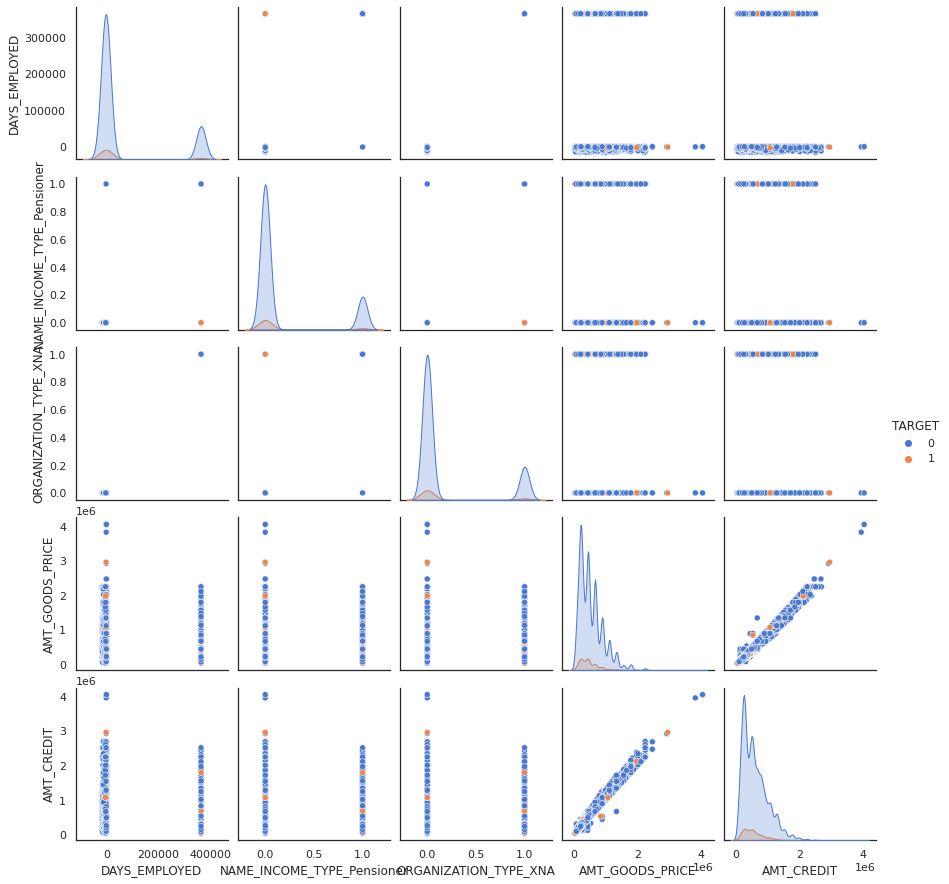

In [26]:
sns.set(
    style="white", 
    palette="muted", 
    color_codes=True,
    rc={'figure.figsize':(12,8)}
)
sns.pairplot(
    df[most_val_features[:5] + ['TARGET']][:30000],
    hue='TARGET'
);

In [27]:
df[['DAYS_EMPLOYED', 'TARGET']].describe()

DAYS_EMPLOYED         TARGET
count  307511.000000  307511.000000
mean    63815.045904       0.080729
std    141275.766519       0.272419
min    -17912.000000       0.000000
25%     -2760.000000       0.000000
50%     -1213.000000       0.000000
75%      -289.000000       0.000000
max    365243.000000       1.000000

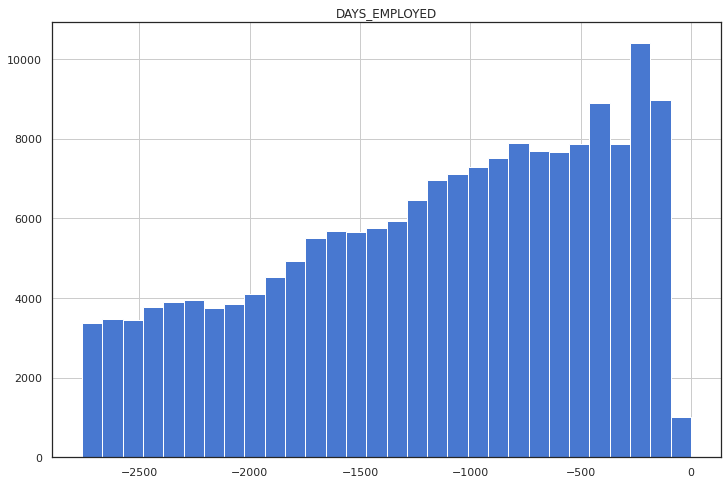

In [28]:
df[(df['DAYS_EMPLOYED'] <= 0) & (df['DAYS_EMPLOYED'] >= -2760)] \
  [['DAYS_EMPLOYED', 'TARGET']].hist(column='DAYS_EMPLOYED', bins=30);